In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv("30-StudentPerformanceFactors.csv")

In [56]:
df.shape

(6607, 20)

In [57]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [58]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [59]:
df.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], inplace=True)


In [60]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [61]:
df = df.drop_duplicates().reset_index(drop=True)

In [62]:
df.shape

(6378, 20)

In [63]:
for x in df.columns:
    print(f'{df[x].name}:\n{df[x].unique()}\n\n')

Hours_Studied:
[23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3 39  2 37 44]


Attendance:
[ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]


Parental_Involvement:
['Low' 'Medium' 'High']


Access_to_Resources:
['High' 'Medium' 'Low']


Extracurricular_Activities:
['No' 'Yes']


Sleep_Hours:
[ 7  8  6 10  9  5  4]


Previous_Scores:
[ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53  83  67]


Motivation_Level:
['Low' 'Medium' 'High']


Internet_Access:
['Yes' 'No']


Tutoring_Sessions:
[0 2 1 3 4 5 6 7 8]


Family_Income:
['Low' 'Medium' 'High']


Teacher_Quality:
['Medium' 'High' 'Low']


School_Type:
['Public' 'Private']


Peer_Influence:
['Positive' 'Negati

In [64]:
numerical_cols=['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity']
categorical_cols=['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Motivation_Level','Internet_Access','Family_Income',
                  'Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities','Gender','Distance_from_Home','Parental_Education_Level',
                  ]
target_cols=['Exam_Score']

EDA for Numerical Columns

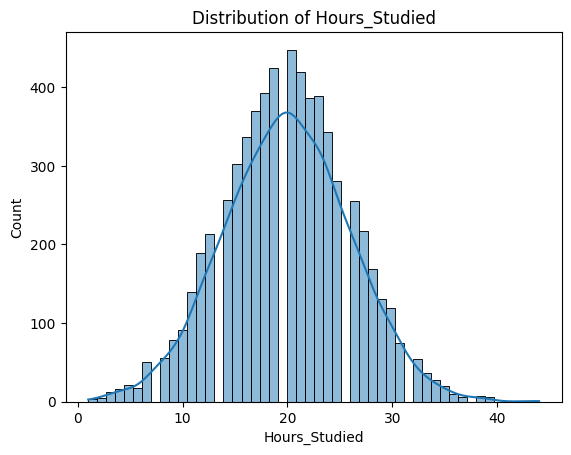

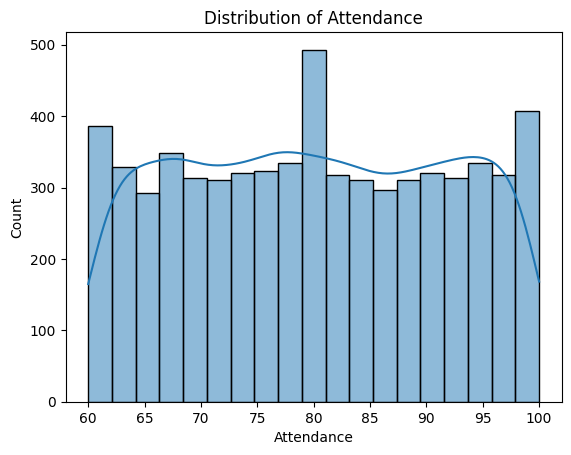

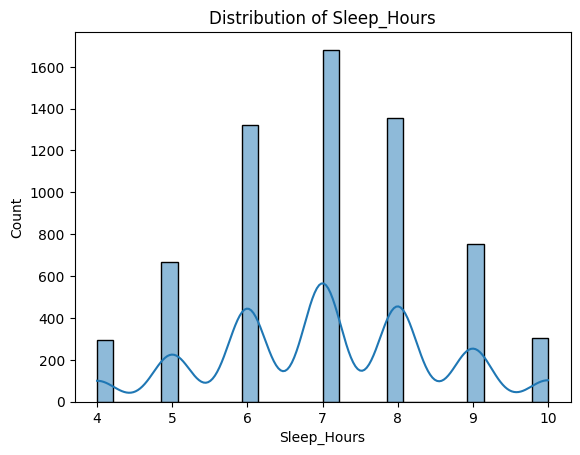

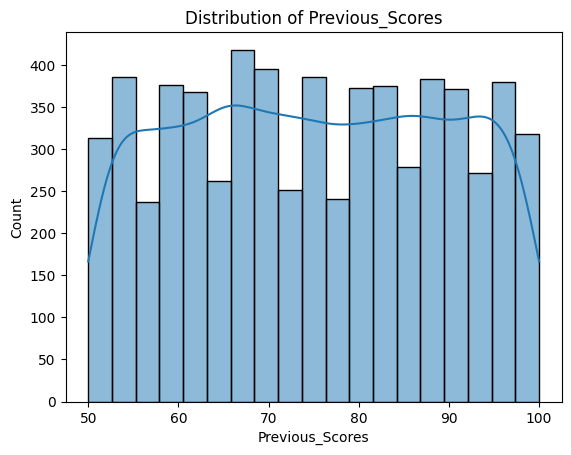

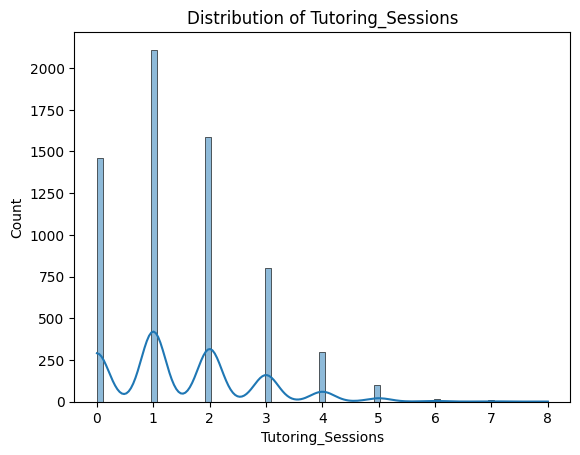

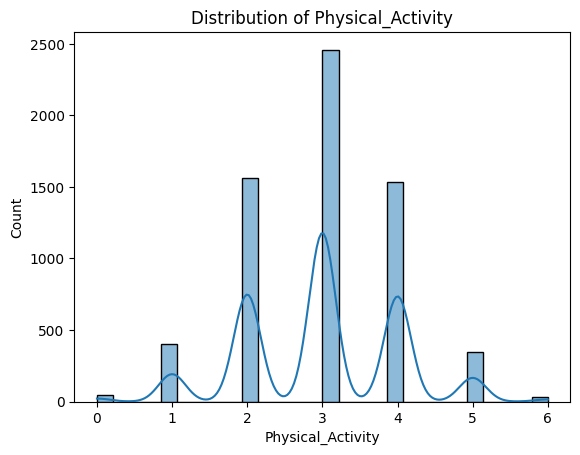

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


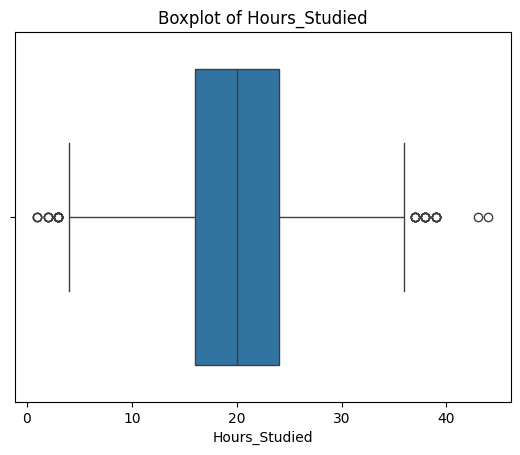

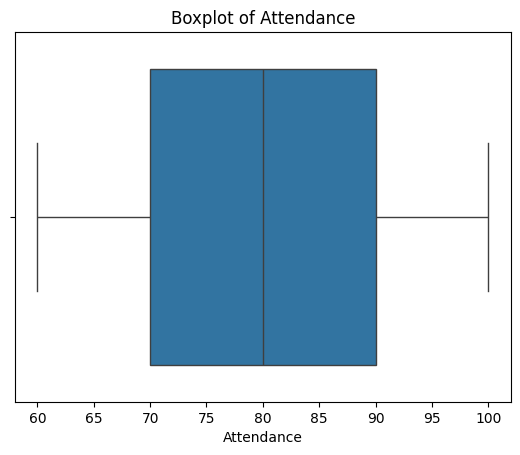

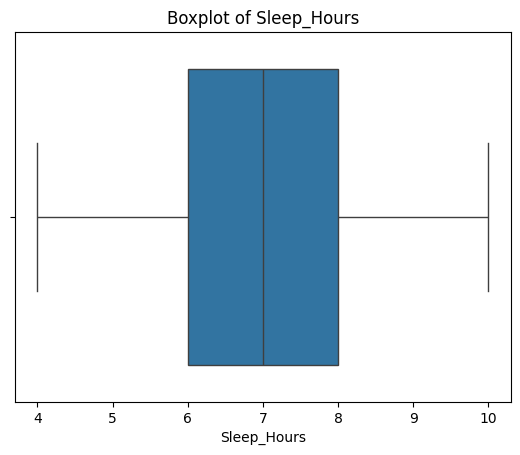

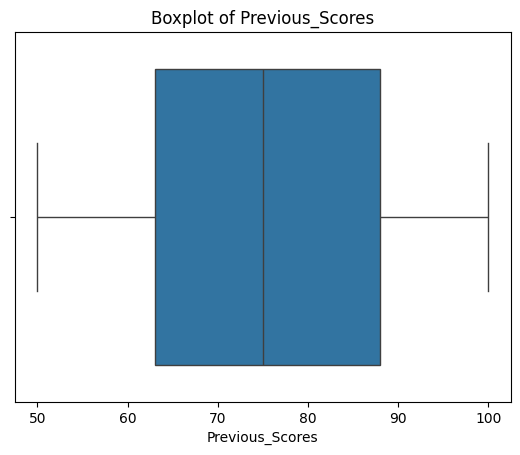

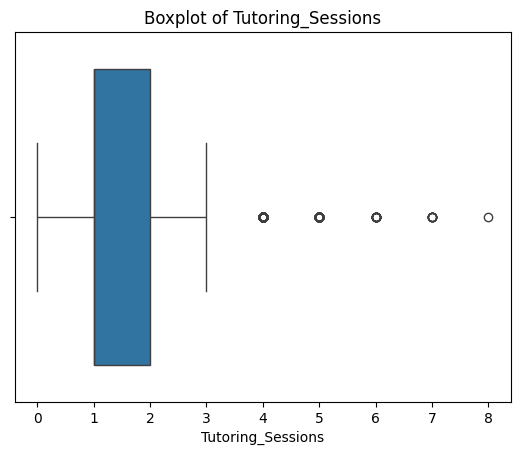

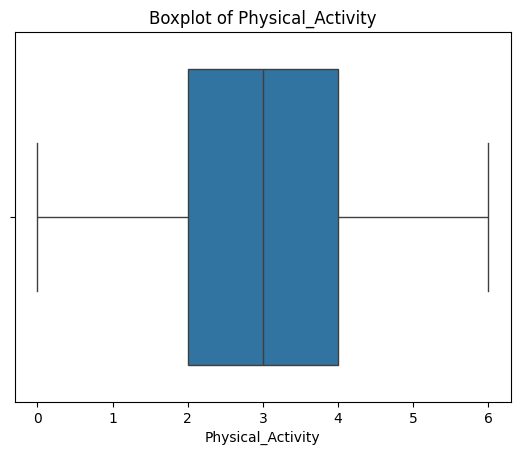

In [66]:
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


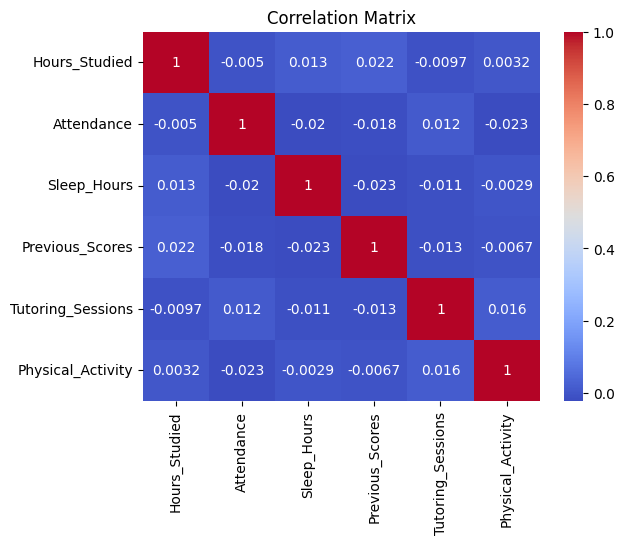

In [67]:
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


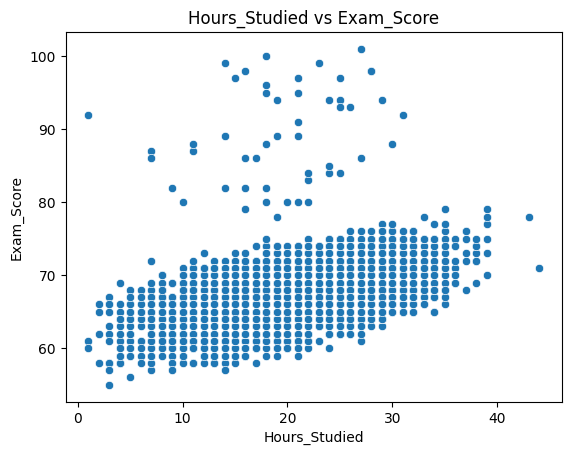

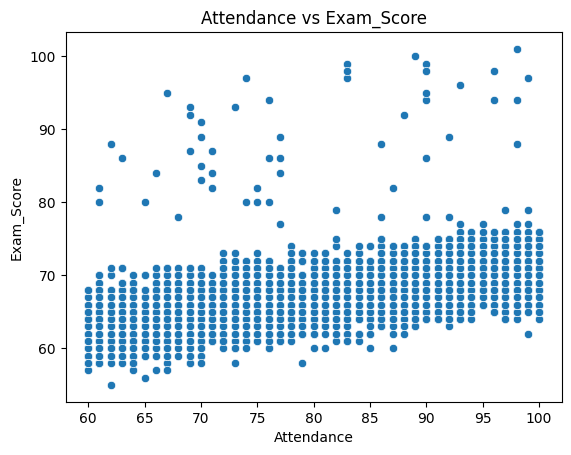

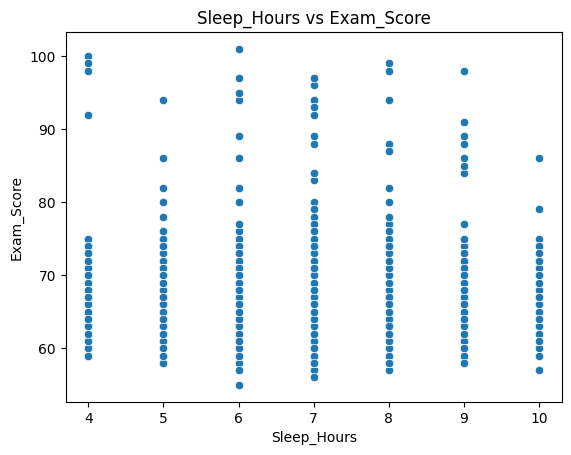

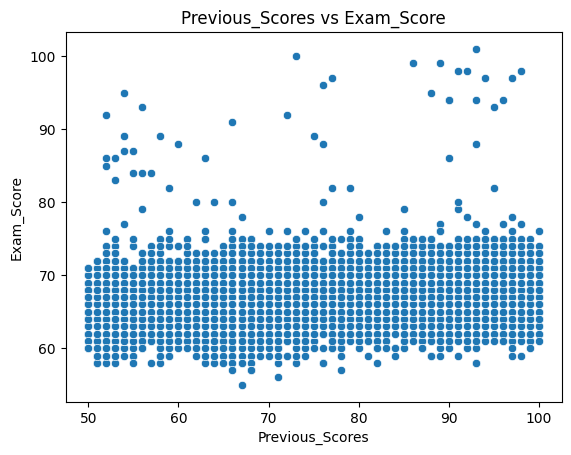

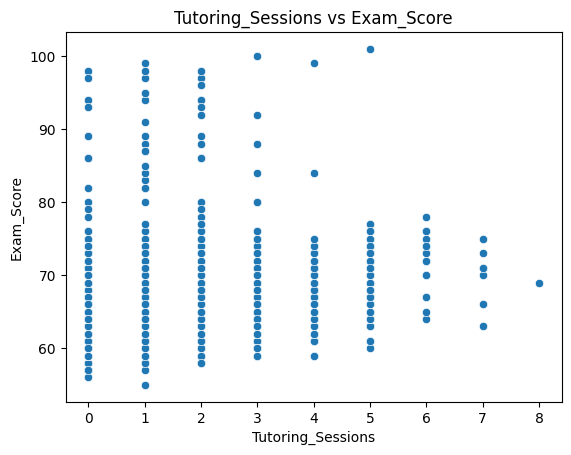

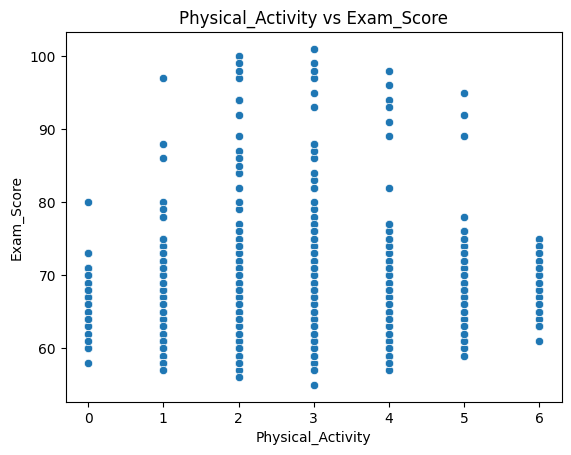

In [68]:
for col in numerical_cols:
    sns.scatterplot(x=df[col], y=df['Exam_Score'])
    plt.title(f'{col} vs Exam_Score')
    plt.show()

In [69]:
df.shape

(6378, 20)

In [70]:
df['Tutoring_Sessions']=np.log1p(df['Tutoring_Sessions']) #log transform skewed distribution

In [71]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [72]:
#z score/ strandardization for almost flat histogram
scaler = MinMaxScaler()

df['Attendance']=scaler.fit_transform(df[['Attendance']])
df['Previous_Scores']=scaler.fit_transform(df[['Previous_Scores']])
df['Tutoring_Sessions']=scaler.fit_transform(df[['Tutoring_Sessions']]) #after reducing skewness
df['Hours_Studied']=scaler.fit_transform(df[['Hours_Studied']]) #normal
df['Sleep_Hours']=scaler.fit_transform(df[['Sleep_Hours']]) #normal
df['Physical_Activity']=scaler.fit_transform(df[['Physical_Activity']])
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.511628,0.600,Low,High,No,0.500000,0.46,Low,Yes,0.000000,Low,Medium,Public,Positive,0.500000,No,High School,Near,Male,67
1,0.418605,0.100,Low,Medium,No,0.666667,0.18,Low,Yes,0.500000,Medium,Medium,Public,Negative,0.666667,No,College,Moderate,Female,61
2,0.534884,0.950,Medium,Medium,Yes,0.500000,0.82,Medium,Yes,0.500000,Medium,Medium,Public,Neutral,0.666667,No,Postgraduate,Near,Male,74
3,0.651163,0.725,Low,Medium,Yes,0.666667,0.96,Medium,Yes,0.315465,Medium,Medium,Public,Negative,0.666667,No,High School,Moderate,Male,71
4,0.418605,0.800,Medium,Medium,Yes,0.333333,0.30,Medium,Yes,0.630930,Medium,High,Public,Neutral,0.666667,No,College,Near,Female,70


EDA for Categorical Features

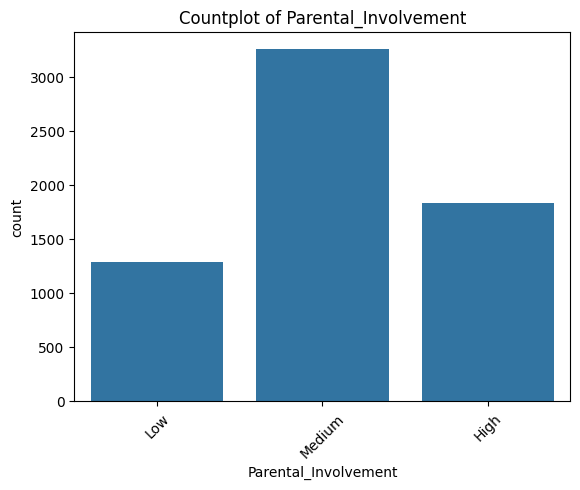

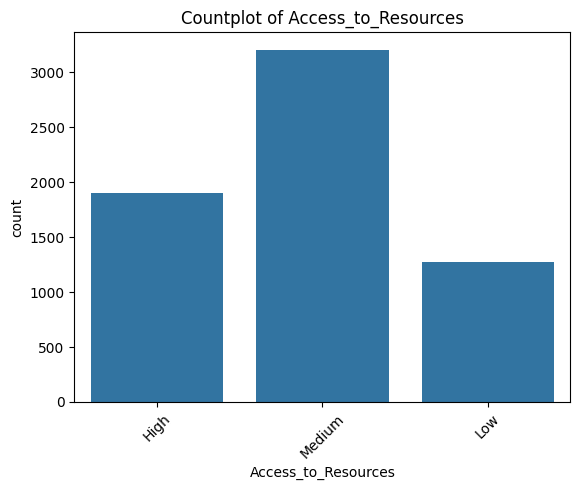

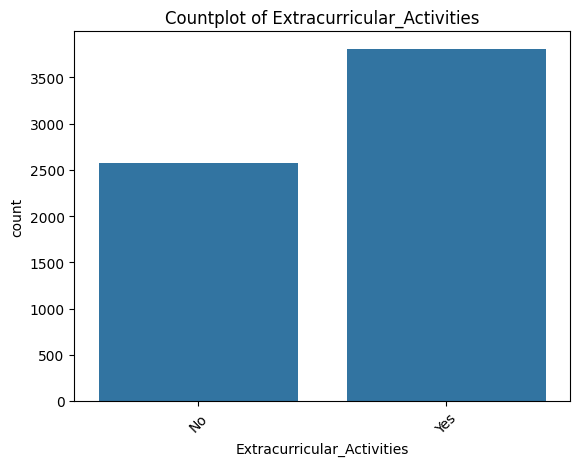

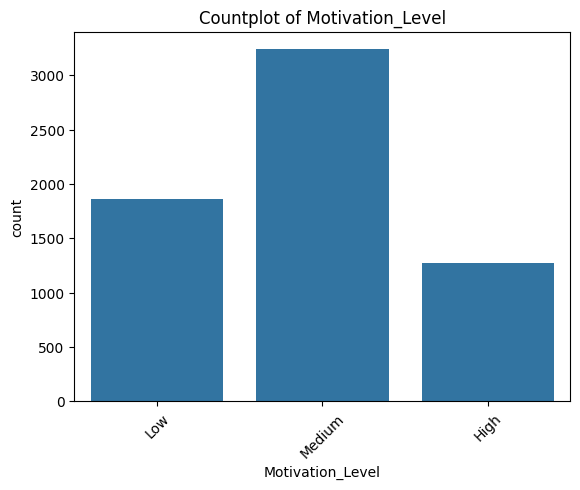

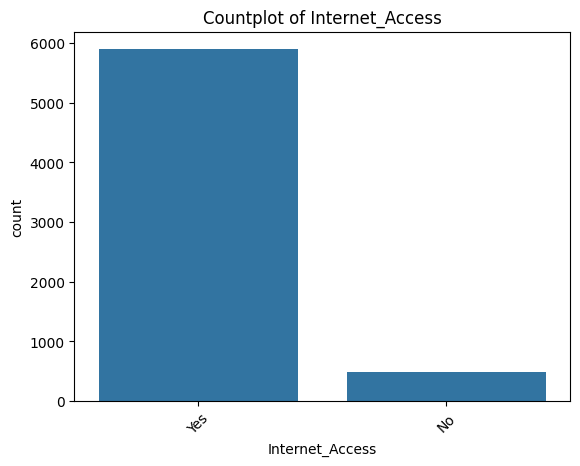

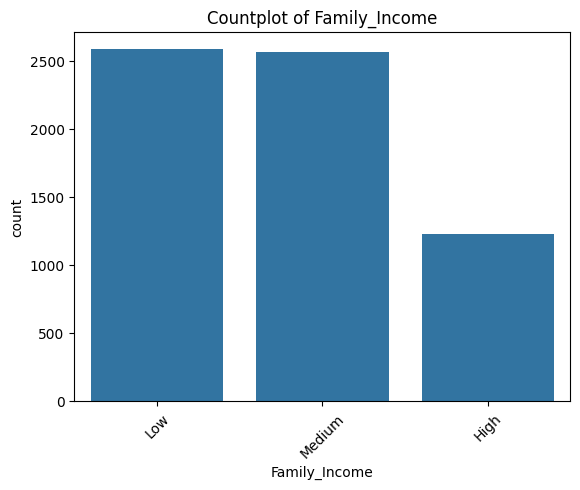

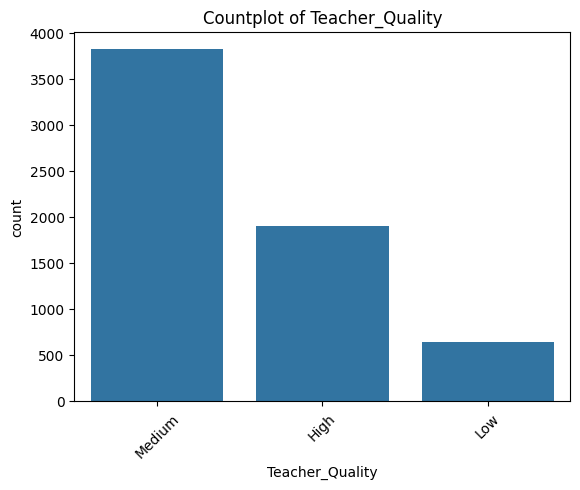

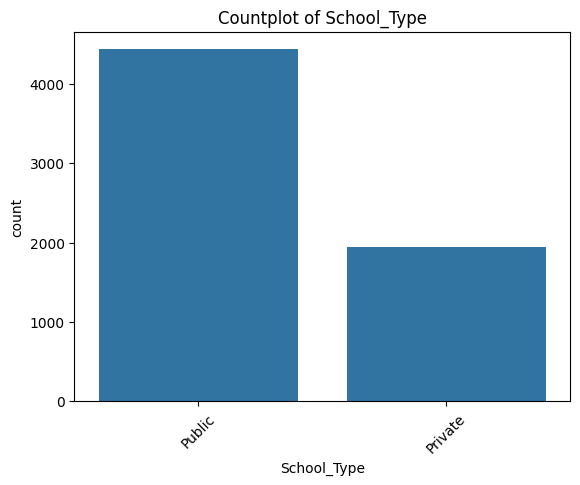

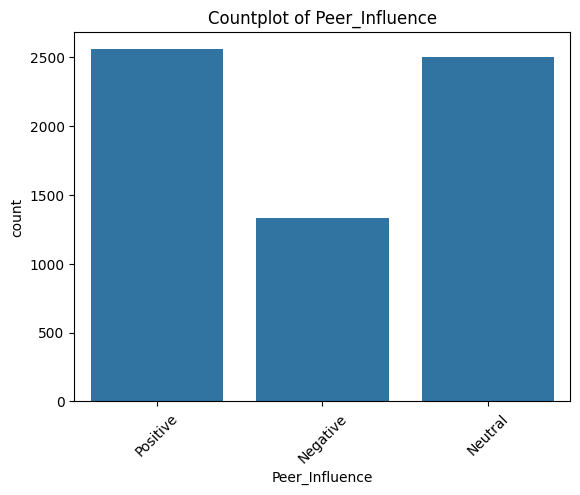

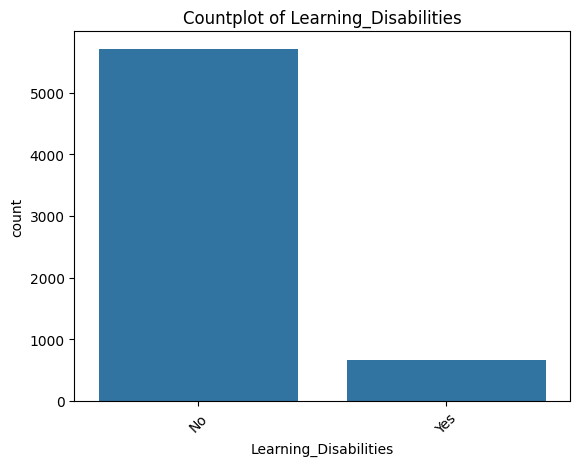

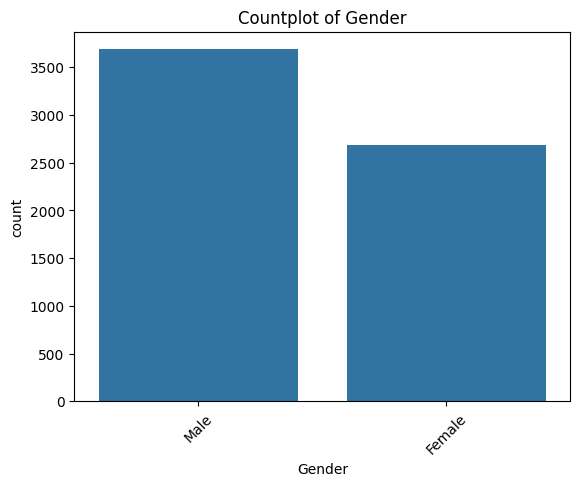

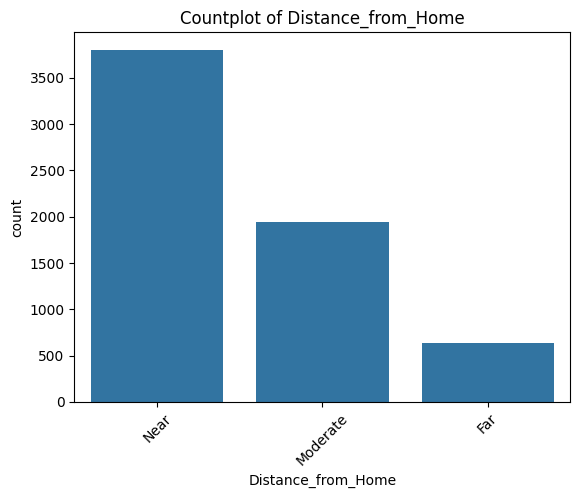

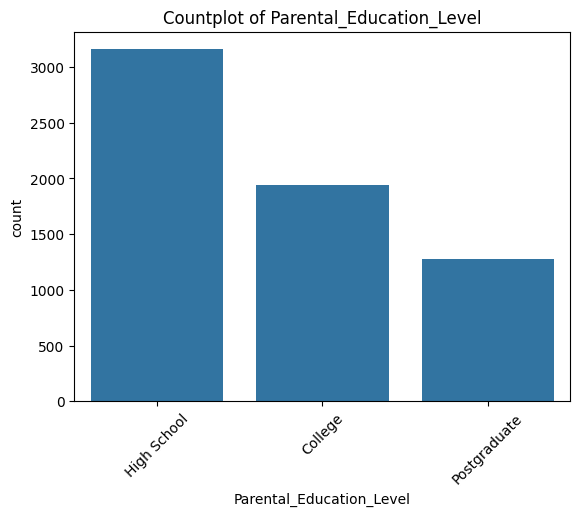

In [73]:
for col in categorical_cols:
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [74]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.511628,0.600,Low,High,No,0.500000,0.46,Low,Yes,0.000000,Low,Medium,Public,Positive,0.500000,No,High School,Near,Male,67
1,0.418605,0.100,Low,Medium,No,0.666667,0.18,Low,Yes,0.500000,Medium,Medium,Public,Negative,0.666667,No,College,Moderate,Female,61
2,0.534884,0.950,Medium,Medium,Yes,0.500000,0.82,Medium,Yes,0.500000,Medium,Medium,Public,Neutral,0.666667,No,Postgraduate,Near,Male,74
3,0.651163,0.725,Low,Medium,Yes,0.666667,0.96,Medium,Yes,0.315465,Medium,Medium,Public,Negative,0.666667,No,High School,Moderate,Male,71
4,0.418605,0.800,Medium,Medium,Yes,0.333333,0.30,Medium,Yes,0.630930,Medium,High,Public,Neutral,0.666667,No,College,Near,Female,70


In [75]:
label_cols = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
    'Internet_Access', 'Family_Income', 'Teacher_Quality', 'Peer_Influence',
    'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home'
]

onehot_cols = ['Extracurricular_Activities', 'School_Type', 'Gender']



In [76]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [77]:
# Label Encoding
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# One-Hot Encoding
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

# Convert any remaining boolean to int (if any)
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})

In [78]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,School_Type_Public,Gender_Male
0,0.511628,0.600,1,0,0.500000,0.46,1,1,0.000000,1,2,2,0.500000,0,1,2,67,0,1,1
1,0.418605,0.100,1,2,0.666667,0.18,1,1,0.500000,2,2,0,0.666667,0,0,1,61,0,1,0
2,0.534884,0.950,2,2,0.500000,0.82,2,1,0.500000,2,2,1,0.666667,0,2,2,74,1,1,1
3,0.651163,0.725,1,2,0.666667,0.96,2,1,0.315465,2,2,0,0.666667,0,1,1,71,1,1,1
4,0.418605,0.800,2,2,0.333333,0.30,2,1,0.630930,2,0,1,0.666667,0,0,2,70,1,1,0


In [79]:
def remove_outliers_iqr_inplace(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers and replace original df
df = remove_outliers_iqr_inplace(df, df.columns)

In [80]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Sleep_Hours', 'Previous_Scores',
       'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions',
       'Family_Income', 'Teacher_Quality', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Exam_Score',
       'Extracurricular_Activities_Yes', 'School_Type_Public', 'Gender_Male'],
      dtype='object')

Model

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    mean_absolute_percentage_error
)

In [82]:
X = df.drop(columns='Exam_Score')
y = df['Exam_Score']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [85]:
df.dtypes

Hours_Studied                     float64
Attendance                        float64
Parental_Involvement                int32
Access_to_Resources                 int32
Sleep_Hours                       float64
Previous_Scores                   float64
Motivation_Level                    int32
Internet_Access                     int32
Tutoring_Sessions                 float64
Family_Income                       int32
Teacher_Quality                     int32
Peer_Influence                      int32
Physical_Activity                 float64
Learning_Disabilities               int32
Parental_Education_Level            int32
Distance_from_Home                  int32
Exam_Score                          int64
Extracurricular_Activities_Yes      int32
School_Type_Public                  int32
Gender_Male                         int32
dtype: object

In [86]:
lr_model = LinearRegression()
lr_model=LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [87]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

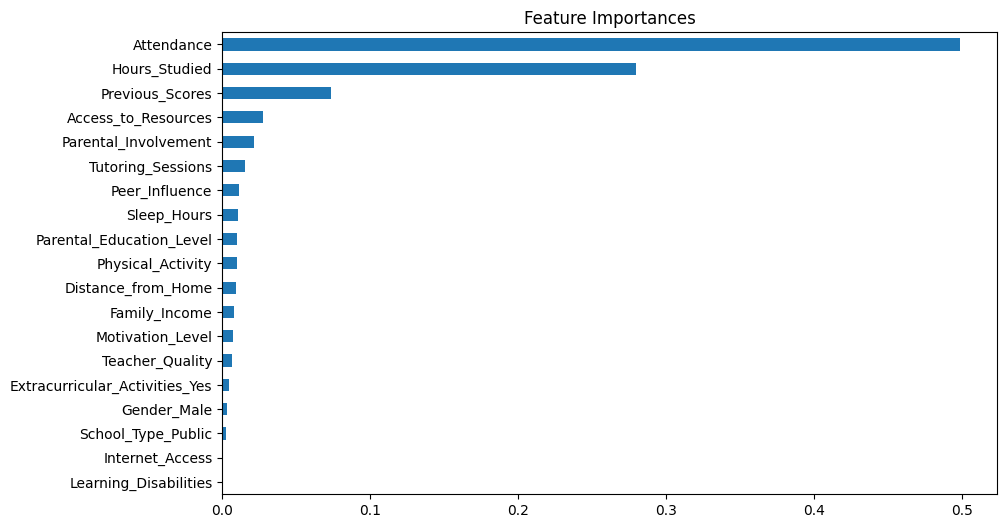

In [88]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importances")
plt.show()

In [89]:
lr_preds = lr_model.predict(X_test)

In [90]:
rf_preds = rf_model.predict(X_test)

In [91]:
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name}")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE : {mean_squared_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_true, y_pred)*100:.2f}%")
    print(f"R²  : {r2_score(y_true, y_pred):.4f}")

In [92]:
evaluate_model("Linear Regression", y_test, lr_preds)


📊 Linear Regression
MAE : 0.8781
MSE : 1.1780
RMSE: 1.0854
MAPE: 1.31%
R²  : 0.8772


In [93]:
evaluate_model("Random Forest Regressor", y_test, rf_preds)


📊 Random Forest Regressor
MAE : 0.9228
MSE : 1.3155
RMSE: 1.1469
MAPE: 1.37%
R²  : 0.8629


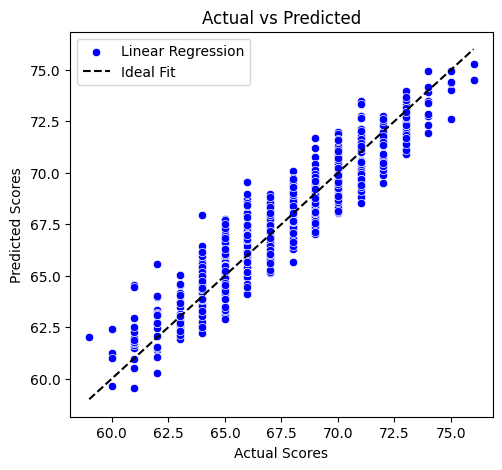

In [94]:
plt.figure(figsize=(12, 5))

# 📈 Scatter Plot: Predictions vs Actual
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, label='Linear Regression', color='blue')
#sns.scatterplot(x=y_test, y=rf_preds, label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal Fit')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted")
plt.legend()


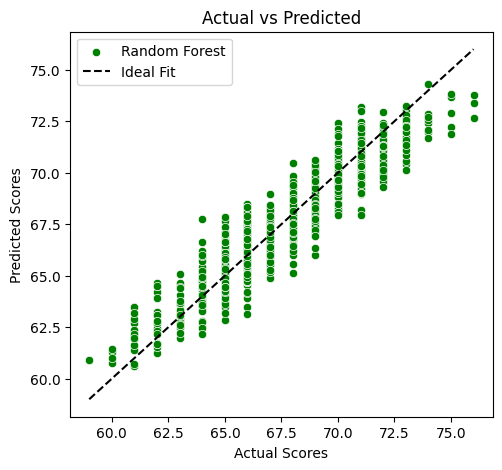

In [95]:
plt.figure(figsize=(12, 5))

# 📈 Scatter Plot: Predictions vs Actual
plt.subplot(1, 2, 1)
#sns.scatterplot(x=y_test, y=lr_preds, label='Linear Regression', color='blue')
sns.scatterplot(x=y_test, y=rf_preds, label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal Fit')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted")
plt.legend()


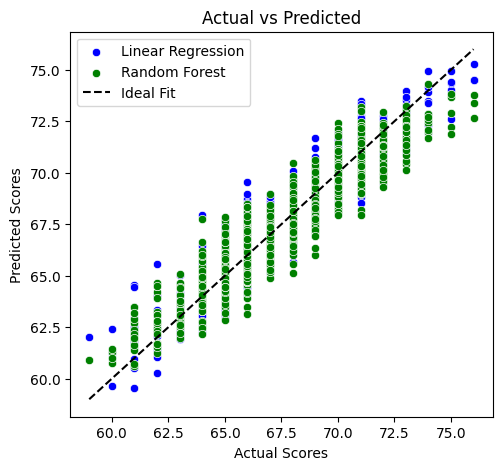

In [96]:
plt.figure(figsize=(12, 5))

# 📈 Scatter Plot: Predictions vs Actual
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, label='Linear Regression', color='blue')
sns.scatterplot(x=y_test, y=rf_preds, label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal Fit')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted")
plt.legend()


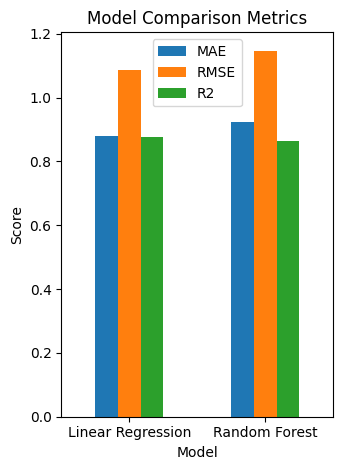

In [97]:
# 📊 Bar Chart: Metric Comparison
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mean_absolute_error(y_test, lr_preds), mean_absolute_error(y_test, rf_preds)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, lr_preds)), np.sqrt(mean_squared_error(y_test, rf_preds))],
    'R2': [r2_score(y_test, lr_preds), r2_score(y_test, rf_preds)]
})

plt.subplot(1, 2, 2)
metrics_df.set_index('Model')[['MAE', 'RMSE', 'R2']].plot(kind='bar', ax=plt.gca(), rot=0)
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.tight_layout()
plt.show()